Intégrale exacte   : 12.15672076
Intégrale approchée: 12.16066794
Erreur absolue     : 3.95e-03


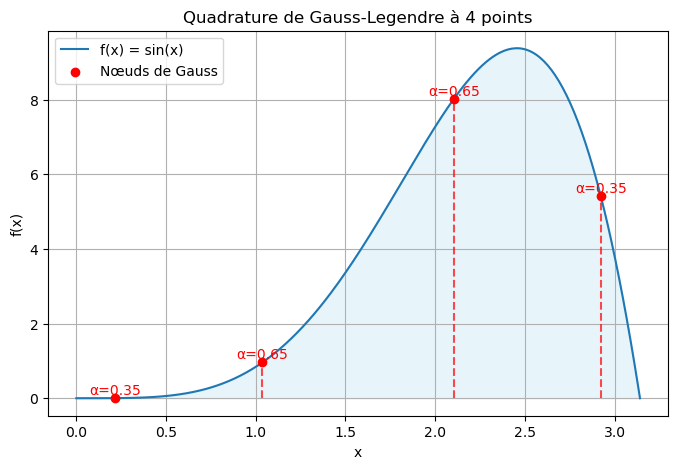

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# =====================================
#  Fonction de quadrature de Gauss-Legendre
# =====================================
def gauss_legendre(f, a, b, n):

    nodes, weights = np.polynomial.legendre.leggauss(n)

    t = 0.5 * (b - a) * nodes + 0.5 * (a + b)
    vals = np.array([f(x) for x in t])
    return 0.5 * (b - a) * np.dot(weights, vals)


# =====================================
# Définition symbolique avec sympy
# =====================================
x = sp.Symbol('x')
f = x**3 * sp.sin(x)                      
a, b = 0, sp.pi     
n = 4 
f_num = sp.lambdify(x, f, modules=['numpy'])                  
#calcul de l'intégrale exacte
I_exact = sp.integrate(f, (x, a, b))  

# =====================================
# Appel de la méthode pour le test
# =====================================
I_approx = gauss_legendre(f_num, float(a), float(b), n)
erreur = abs(I_exact - I_approx)

print(f"Intégrale exacte   : {float(I_exact):.8f}")
print(f"Intégrale approchée: {I_approx:.8f}")
print(f"Erreur absolue     : {float(erreur):.2e}")

# =====================================
#  Représentation graphique
# =====================================
nodes, weights = np.polynomial.legendre.leggauss(n)
t = 0.5 * (float(b) - float(a)) * nodes + 0.5 * (float(a) + float(b))

# Tracé
x_n = np.linspace(float(a), float(b), 300)
plt.figure(figsize=(8,5))
plt.plot(x_n, f_num(x_n), label='f(x) = sin(x)')
plt.fill_between(x_n, f_num(x_n), alpha=0.2, color='skyblue')

# Points de Gauss
plt.scatter(t, f_num(t), color='red', label='Nœuds de Gauss', zorder=5)
for i in range(n):
    plt.vlines(t[i], 0, f_num(t[i]), colors='red', linestyles='dashed', alpha=0.7)
    plt.text(t[i], f_num(t[i])+0.1, f'α={weights[i]:.2f}', ha='center', color='red')

plt.title(f"Quadrature de Gauss-Legendre à {n} points")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()
